In [269]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm  

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore") 

### Load dataframe

In [270]:
property_data = pd.read_csv("train.csv")
property_data.shape

(1460, 81)

In [271]:
property_data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [272]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [273]:
property_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### User Defined functions

In [274]:
#function to check for nulls and only display the columns having null count>0
def null_check(dataframe, percentage=True):
    if percentage==True:
        return round(dataframe.isnull().mean()[dataframe.isnull().mean()>0].apply(lambda x: x*100),3)
    else:
        return dataframe.isnull().sum()[dataframe.isnull().sum()>0]
    
#function to drop columns based on NULLs percentage
def dropna_cols_perc(dataframe, percentage):
    n_thresh = int(len(dataframe)*(1-(percentage/100)))
    dataframe.dropna(axis=1, thresh=n_thresh, inplace=True)
    
#function to drop irrelevant columns
def drop_irrelevant_columns(dataframe, column_list):
    dataframe.drop(column_list, axis=1, inplace=True, errors='ignore')
    
#function to drop rows of columns with insignificant nulls
def drop_insignificant_rows(dataframe,column_list):
    dataframe.dropna(subset=column_list, inplace=True)
    
#function to find percentage of rows having value as 0
def zero_rows_percentage(dataframe, cut_off=90):
    lst_rows=[]
    for col in dataframe.columns:
        perc = round(100*len(dataframe[dataframe[col]==0])/len(dataframe),2)
        if perc>=cut_off:
            print(col, perc)
            lst_rows.append(col)
    return lst_rows

### Data Cleaning - Handle Nulls

In [275]:
null_check(property_data)

LotFrontage     17.740
Alley           93.767
MasVnrType       0.548
MasVnrArea       0.548
BsmtQual         2.534
BsmtCond         2.534
BsmtExposure     2.603
BsmtFinType1     2.534
BsmtFinType2     2.603
Electrical       0.068
FireplaceQu     47.260
GarageType       5.548
GarageYrBlt      5.548
GarageFinish     5.548
GarageQual       5.548
GarageCond       5.548
PoolQC          99.521
Fence           80.753
MiscFeature     96.301
dtype: float64

#### Drop all columns with more than 85% nulls in them

In [276]:
dropna_cols_perc(property_data, 85)

In [277]:
null_check(property_data)

LotFrontage     17.740
MasVnrType       0.548
MasVnrArea       0.548
BsmtQual         2.534
BsmtCond         2.534
BsmtExposure     2.603
BsmtFinType1     2.534
BsmtFinType2     2.603
Electrical       0.068
FireplaceQu     47.260
GarageType       5.548
GarageYrBlt      5.548
GarageFinish     5.548
GarageQual       5.548
GarageCond       5.548
Fence           80.753
dtype: float64

#### Drop null rows for columns having less than 3 percent nulls

In [278]:
lst_3pct_or_less_nulls = ['MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
                          'BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical']

drop_insignificant_rows(property_data, lst_3pct_or_less_nulls)

In [279]:
null_check(property_data)

LotFrontage     17.776
FireplaceQu     46.530
GarageType       5.241
GarageYrBlt      5.241
GarageFinish     5.241
GarageQual       5.241
GarageCond       5.241
Fence           80.382
dtype: float64

#### Drop irrelevant columns

In [280]:
#Id column is of no use to us, so drop it
drop_irrelevant_columns(property_data, ['Id'])

In [281]:
#FireplaceQu is have 47% missing values and we have fireplaces column to represent number of fireplaces (including 0)
#So removing FireplaceQu
drop_irrelevant_columns(property_data, ['FireplaceQu'])

In [282]:
null_check(property_data)

LotFrontage     17.776
GarageType       5.241
GarageYrBlt      5.241
GarageFinish     5.241
GarageQual       5.241
GarageCond       5.241
Fence           80.382
dtype: float64

#### Check Garage columns

In [283]:
property_data['GarageType'].value_counts()

Attchd     852
Detchd     369
BuiltIn     85
Basment     19
CarPort      7
2Types       6
Name: GarageType, dtype: int64

In [284]:
#Impute GarageType NA with none indicating 'No Garage'
property_data['GarageType'].fillna('None', inplace=True)

#Impute GarageFinish NA with none indicating 'No Garage'
property_data['GarageFinish'].fillna('None', inplace=True)

#Impute GarageQual NA with none indicating 'No Garage'
property_data['GarageQual'].fillna('None', inplace=True)

#Impute GarageCond NA with none indicating 'No Garage'
property_data['GarageCond'].fillna('None', inplace=True)

#Impute GarageYrBlt NA with current year indicating 'No Garage'
#Doing this as when we derive a column from year it will come up as 0
now = dt.datetime.now()
property_data['GarageYrBlt'].fillna(now.year, inplace=True)

In [285]:
null_check(property_data)

LotFrontage    17.776
Fence          80.382
dtype: float64

#### Check Fence

In [286]:
property_data['Fence'].value_counts()

MnPrv    154
GdPrv     58
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [287]:
#impute NAs with NoFnc indicating No Fence
property_data['Fence'].fillna('NoFnc', inplace=True)
property_data['Fence'].value_counts()

NoFnc    1135
MnPrv     154
GdPrv      58
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [288]:
null_check(property_data)

LotFrontage    17.776
dtype: float64

#### Check LotFrontage

In [289]:
#There are 18% nulls in LotFrontage, check column
property_data[property_data['LotFrontage'].isnull()].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NoFnc,350,11,2009,WD,Normal,200000
12,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,176,0,NoFnc,0,9,2008,WD,Normal,144000
14,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,GdWo,0,5,2008,WD,Normal,157000
16,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,NoFnc,700,3,2010,WD,Normal,149000
24,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,MnPrv,0,5,2010,WD,Normal,154000


In [290]:
property_data['LotFrontage'].describe(percentiles = [0.25,0.50,0.75,0.90,.99])

count    1161.000000
mean       70.139535
std        24.576015
min        21.000000
25%        59.000000
50%        70.000000
75%        80.000000
90%        96.000000
99%       142.200000
max       313.000000
Name: LotFrontage, dtype: float64

#### Outlier, we see that we have outliers in LotFrontage

In [291]:
#Check mean ratio of LotFrontage vs Area
(property_data[property_data['LotFrontage']<150]['LotFrontage']/property_data['LotArea']).mean()

0.007879126767158105

In [292]:
#Check mean ratio of LotFrontage vs Area for outliers
#It comes out to be a little high, but it could be correct for large houses - so leaving as is
(property_data[property_data['LotFrontage']>150]['LotFrontage']/property_data['LotArea']).mean()

0.012688251661491123

In [293]:
#check correlation between Lot frontage and area
property_data['LotFrontage'].corr(property_data['LotArea'])

0.4239536484817433

In [294]:
# They are correlated but not highly
# Dropping null rows for LotFrontage as can't be imputed
drop_insignificant_rows(property_data, ['LotFrontage'])

In [295]:
null_check(property_data)

Series([], dtype: float64)

### Data Cleaning - Handle Date Types

In [296]:
#below columns are picked up as numeric types, but they should be date type
#we will modify them to instead have value as current year - year 
#GarageYrBlt
#YearBuilt
#YearRemodAdd
#YrSold
property_data['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1161, dtype: float64

In [297]:
#Modify date columns to have year difference
property_data['GarageYrBlt'] = now.year - property_data['GarageYrBlt']
property_data['YearBuilt'] = now.year - property_data['YearBuilt']
property_data['YearRemodAdd'] = now.year - property_data['YearRemodAdd']
property_data['YrSold'] = now.year - property_data['YrSold']

In [298]:
property_data['GarageYrBlt']

0       18.0
1       45.0
2       20.0
3       23.0
4       21.0
        ... 
1455    22.0
1456    43.0
1457    80.0
1458    71.0
1459    56.0
Name: GarageYrBlt, Length: 1161, dtype: float64

### Data Cleaning - Handle Numeric types

In [299]:
# Get all numeric data from data frame
property_data_numeric = property_data.select_dtypes(include=['float64','int64'])
property_data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,18,18,196.0,706,0,...,0,61,0,0,0,0,0,2,13,208500
1,20,80.0,9600,6,8,45,45,0.0,978,0,...,298,0,0,0,0,0,0,5,14,181500
2,60,68.0,11250,7,5,20,19,162.0,486,0,...,0,42,0,0,0,0,0,9,13,223500
3,70,60.0,9550,7,5,106,51,0.0,216,0,...,0,35,272,0,0,0,0,2,15,140000
4,60,84.0,14260,8,5,21,21,350.0,655,0,...,192,84,0,0,0,0,0,12,13,250000


In [300]:
# Drop numerical columns from property_data frame
# This is to then add modified numerical columns
property_data.drop(property_data_numeric.columns, axis=1, inplace=True)

In [301]:
#find columns having more than 85% values as 0
lst_above_85perc_zeros = zero_rows_percentage(property_data_numeric, 85)

BsmtFinSF2 89.15
LowQualFinSF 97.93
BsmtHalfBath 94.57
3SsnPorch 98.54
ScreenPorch 91.82
PoolArea 99.48
MiscVal 96.99


In [302]:
#delete these columns as more than 85% values are 0
drop_irrelevant_columns(property_data_numeric, lst_above_85perc_zeros)

In [303]:
#check remaining columns
property_data_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [304]:
#Left with 30 numeric columns - dropped 8 as they were mostly zero
property_data_numeric.shape

(1161, 30)

In [305]:
#Check Outliers for numeric columns
property_data_numeric.describe(percentiles = [0.25,0.50,0.75,0.90,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,...,1161.000000,1161.000000,1161.000000,1161.000000,1161.00000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,57.028424,70.139535,9973.831180,6.159345,5.581395,50.329027,35.559001,104.477175,437.252369,603.917313,...,0.581395,39.985357,1.770887,474.689061,91.46770,46.487511,22.857881,6.335056,13.205857,182374.280792
std,43.081199,24.576015,8036.762571,1.396276,1.094878,31.945999,21.057602,186.851425,464.549380,443.625809,...,0.630105,27.050858,0.775184,220.547490,121.34584,66.309775,61.801417,2.707057,1.329960,83269.134927
min,20.000000,21.000000,1300.000000,2.000000,2.000000,11.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,11.000000,34900.000000
25%,20.000000,59.000000,7500.000000,5.000000,5.000000,18.000000,17.000000,0.000000,0.000000,270.000000,...,0.000000,17.000000,1.000000,312.000000,0.00000,0.000000,0.000000,5.000000,12.000000,129000.000000
50%,50.000000,70.000000,9300.000000,6.000000,5.000000,49.000000,26.000000,0.000000,371.000000,530.000000,...,1.000000,33.000000,2.000000,480.000000,0.00000,25.000000,0.000000,6.000000,13.000000,160000.000000
75%,70.000000,80.000000,11302.000000,7.000000,6.000000,71.000000,55.000000,165.000000,699.000000,844.000000,...,1.000000,60.000000,2.000000,583.000000,168.00000,68.000000,0.000000,8.000000,14.000000,215000.000000
90%,120.000000,96.000000,13860.000000,8.000000,7.000000,100.000000,71.000000,336.000000,1059.000000,1266.000000,...,1.000000,80.000000,3.000000,776.000000,252.00000,130.000000,112.000000,10.000000,15.000000,286000.000000
99%,190.000000,142.200000,32922.000000,10.000000,9.000000,129.000000,71.000000,864.000000,1625.800000,1814.400000,...,2.000000,105.000000,3.000000,1005.000000,478.80000,285.800000,261.000000,12.000000,15.000000,448536.600000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,149.000000,71.000000,1600.000000,5644.000000,2336.000000,...,3.000000,121.000000,4.000000,1418.000000,857.00000,547.000000,552.000000,12.000000,15.000000,755000.000000


#There are outliers in some of the columns like LotFrontage, LotArea, MasVnrArea - 
#but we will be performing scaling later to take care of them as the outliers looks legit

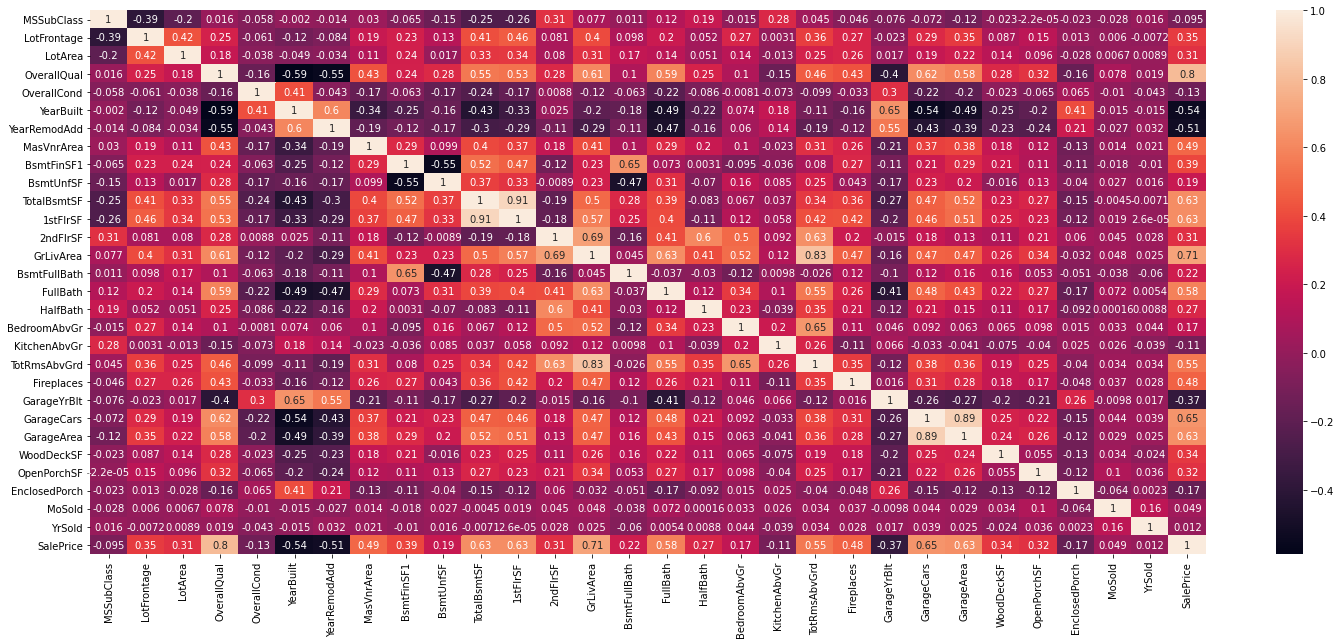

In [306]:
#Check correlation between numeric variables
plt.figure(figsize=(25,10))
sns.heatmap(property_data_numeric.corr(), annot=True)
plt.show()

##### Note variables that are highly correlated with SalePrice
    #OverallQual
    #GrLivArea
    #GarageCars
    #GarageArea (highly correlated with GarageCars)
    #TotalBsmtSF
    #1stFlrSF (highly correlated with TotalBsmtSF)
    #FullBath

In [307]:
# Drop 1stFlrSF and GarageArea as they will cause multicolinearity
# We will look at more multicolinearity with VIF, but for now these can be removed
drop_irrelevant_columns(property_data_numeric, ['GarageArea','1stFlrSF'])

In [308]:
#Left with 28 numeric columns 
property_data_numeric.shape

(1161, 28)

In [309]:
property_data_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [310]:
# Concat filtered/modified numeric columns to original property_data frame
property_data=pd.concat([property_data, property_data_numeric], axis=1)
property_data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,8,0,18.0,2,0,61,0,2,13,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,6,1,45.0,2,298,0,0,5,14,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,6,1,20.0,2,0,42,0,9,13,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,7,1,23.0,3,0,35,272,2,15,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,9,1,21.0,3,192,84,0,12,13,250000


### Data Cleaning - Handle Categorical Data

In [311]:
# Get all categorical data from data frame
property_data_categorical = property_data.select_dtypes(include=['object'])
property_data_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,NoFnc,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,NoFnc,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,NoFnc,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,NoFnc,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,NoFnc,WD,Normal


In [312]:
# Drop categorical columns from property_data frame
# This is to add only dummies later
property_data.drop(property_data_categorical.columns, axis=1, inplace=True)

In [313]:
# Get dummies for all categorical columns
property_data_categorical = pd.get_dummies(property_data_categorical, drop_first=True)
property_data_categorical.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [314]:
# Concat dummies to original property_data frame
property_data=pd.concat([property_data, property_data_categorical], axis=1)
property_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,18,18,196.0,706,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,45,45,0.0,978,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,20,19,162.0,486,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,106,51,0.0,216,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,21,21,350.0,655,490,...,0,0,0,0,1,0,0,0,1,0


### Data Analysis

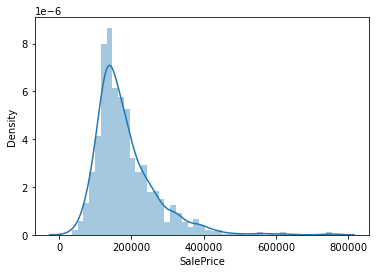

In [315]:
#Most of the houses are sold in 100,000 to 300,000 range
sns.distplot(property_data['SalePrice'])
plt.show()

In [316]:
#Since there are valid outliers, take transform SalePrice to log(SalePrice)
property_data['SalePrice'] = np.log(property_data['SalePrice'])

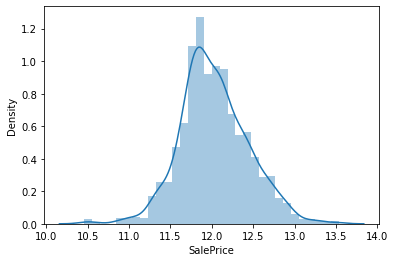

In [317]:
#Check for plot again
sns.distplot(property_data['SalePrice'])
plt.show()

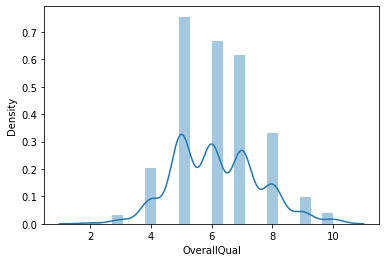

In [318]:
#Most of the houses have a built quality of 5,6,or 7
sns.distplot(property_data['OverallQual'])
plt.show()

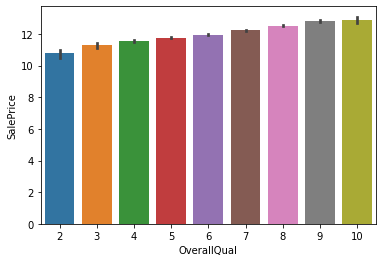

In [319]:
#Below plot shows better the build quaity, higher is the sale price
sns.barplot(x='OverallQual',y ='SalePrice', data=property_data)
plt.show()

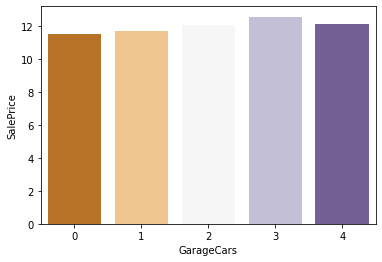

In [320]:
#Below plot shows that Garages with 3 car parks sells for highest price
sns.barplot(x='GarageCars',y ='SalePrice', data=property_data,palette=sns.color_palette("PuOr", 5),ci=False)
plt.show()

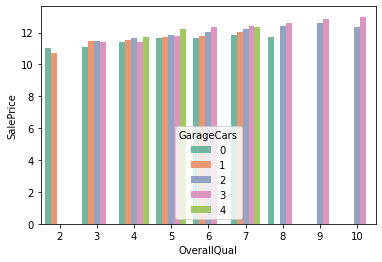

In [321]:
#High quality houses have 2 or 3 car spaces in garage
#For that reason we saw that 3 park spaces houses sells for highest price
sns.barplot(x='OverallQual', y='SalePrice', data=property_data,palette='Set2',ci=False,hue='GarageCars')
plt.show()

### Data Preparation

#### Train Test Split

In [322]:
#Perform train test split
df_train, df_test = train_test_split(property_data, train_size=0.7, test_size=0.3, random_state=100)

In [323]:
#Get a list of numeric columns
numeric_cols = df_train.select_dtypes(include=['float64','int64']).columns

#### Scaling

In [324]:
#Perform scaling
scaler = MinMaxScaler()
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [325]:
#Get X and y from train test data frames
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [326]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
112,0.235294,0.191781,0.136004,0.625,0.428571,0.014599,0.050000,0.159652,0.174344,0.130051,...,0,0,1,0,0,0,0,0,0,1
775,0.588235,0.037671,0.048438,0.500,0.428571,0.080292,0.200000,0.232221,0.153437,0.156990,...,0,0,0,0,1,0,0,0,1,0
1454,0.000000,0.140411,0.096507,0.625,0.428571,0.036496,0.083333,0.000000,0.072644,0.376684,...,0,0,0,0,1,0,0,0,1,0
877,0.235294,0.181507,0.117882,0.875,0.428571,0.036496,0.083333,0.156749,0.207300,0.135625,...,0,0,0,0,1,0,0,0,1,0
581,0.000000,0.263699,0.179891,0.750,0.428571,0.007299,0.016667,0.222061,0.000000,0.948444,...,0,0,1,0,0,0,0,0,0,1


#### Feature Selection

In [327]:
#Perform feature selection using RFE
#Lets start with top 30 columns
rfe = RFE(LinearRegression(), 30)
rfe.fit(X_train,  y_train)

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [328]:
X_train.columns[rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'OpenPorchSF',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandSlope_Sev', 'Neighborhood_StoneBr', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_CemntBd', 'Exterior2nd_CmentBd', 'Foundation_Wood',
       'Functional_Maj2'],
      dtype='object')

In [329]:
#Update X train and test to have only top 30 features
X_train = X_train[X_train.columns[rfe.support_]]
X_test = X_test[X_test.columns[rfe.support_]]

### User defined functions for Model Building

In [330]:
def train_test_predict(obj, X_trn, X_tst):
    y_trn_pred = obj.predict(X_trn)
    y_tst_pred = obj.predict(X_tst)
    return y_trn_pred, y_tst_pred

def print_metrics_r2(y_trn, y_tst, y_trn_pred, y_tst_pred):
    print('Train_r2:',round(r2_score(y_trn, y_trn_pred),3))
    print('Test_r2:',round(r2_score(y_tst, y_tst_pred),3))

### Linear Regression Model

In [331]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [332]:
#Predict train and test using user defined function
y_train_pred, y_test_pred = train_test_predict(lm, X_train, X_test)

In [333]:
#Print R2 for train and test using user defined function
print_metrics_r2(y_train, y_test, y_train_pred, y_test_pred)

Train_r2: 0.932
Test_r2: 0.619


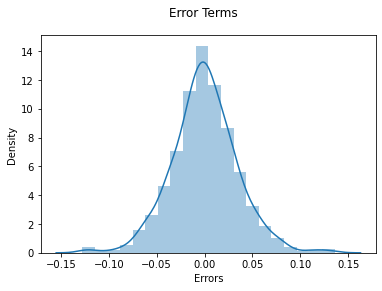

In [334]:
fig = plt.figure()
sns.distplot((y_train_pred - y_train), bins=20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')
plt.show()

#### We can see that linear model is valid, but is performing poorly - lets look for multicollinearity

In [335]:
#Fit model
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     355.4
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:51:50   Log-Likelihood:                 1583.1
No. Observations:                 812   AIC:                            -3104.
Df Residuals:                     781   BIC:                            -2958.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1410 

In [336]:
#drop high p column
X_train.drop(['Street_Pave'],axis=1, inplace=True, errors='ignore')
#Fit model again
lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     355.4
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:51:50   Log-Likelihood:                 1583.1
No. Observations:                 812   AIC:                            -3104.
Df Residuals:                     781   BIC:                            -2958.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1410 

In [337]:
#drop high p column
X_train.drop(['RoofStyle_Hip'],axis=1, inplace=True, errors='ignore')
#Fit model again
lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     367.4
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:51:50   Log-Likelihood:                 1582.4
No. Observations:                 812   AIC:                            -3105.
Df Residuals:                     782   BIC:                            -2964.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0930 

In [338]:
#drop high p column
X_train.drop(['RoofStyle_Gable'],axis=1, inplace=True, errors='ignore')
#Fit model again
lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     380.9
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:51:50   Log-Likelihood:                 1582.2
No. Observations:                 812   AIC:                            -3106.
Df Residuals:                     783   BIC:                            -2970.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0886 

In [339]:
#drop high p column
X_train.drop(['RoofStyle_Gambrel'],axis=1, inplace=True, errors='ignore')
#Fit model again
lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     394.3
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:51:50   Log-Likelihood:                 1581.1
No. Observations:                 812   AIC:                            -3106.
Df Residuals:                     784   BIC:                            -2975.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0891 

In [340]:
#drop high p column
X_train.drop(['Exterior1st_CemntBd'],axis=1, inplace=True, errors='ignore')
#Fit model again
lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     407.9
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:51:50   Log-Likelihood:                 1579.2
No. Observations:                 812   AIC:                            -3104.
Df Residuals:                     785   BIC:                            -2977.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0842 

In [341]:
#drop high p column
X_train.drop(['Exterior2nd_CmentBd'],axis=1, inplace=True, errors='ignore')
#Fit model again
lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     424.3
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:51:50   Log-Likelihood:                 1578.8
No. Observations:                 812   AIC:                            -3106.
Df Residuals:                     786   BIC:                            -2983.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0862 

In [342]:
#drop high p column
X_train.drop(['LandSlope_Sev'],axis=1, inplace=True, errors='ignore')
#Fit model again
lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     440.8
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:51:50   Log-Likelihood:                 1577.2
No. Observations:                 812   AIC:                            -3104.
Df Residuals:                     787   BIC:                            -2987.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0863 

#### All coefficients looks significant now, lets check for collinearity using VIF

In [343]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = X_train.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,RoofMatl_CompShg,193.74
12,MSZoning_RL,148.08
13,MSZoning_RM,32.52
2,OverallQual,29.55
6,TotalBsmtSF,16.02
3,OverallCond,15.48
8,GarageCars,12.66
7,GrLivArea,11.80
0,LotFrontage,10.11
10,MSZoning_FV,9.51


In [344]:
#drop high VIF column
X_train.drop(['RoofMatl_CompShg'],axis=1, inplace=True, errors='ignore')
#Fit model again
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     246.1
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:51:51   Log-Likelihood:                 1346.6
No. Observations:                 812   AIC:                            -2645.
Df Residuals:                     788   BIC:                            -2532.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0334 

In [345]:
#drop high VIF column
X_train.drop(['RoofMatl_Tar&Grv'],axis=1, inplace=True, errors='ignore')
#Fit model again
lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     257.6
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:51:51   Log-Likelihood:                 1346.5
No. Observations:                 812   AIC:                            -2647.
Df Residuals:                     789   BIC:                            -2539.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0333 

In [346]:
#drop high VIF column
X_train.drop(['LotFrontage'],axis=1, inplace=True, errors='ignore')
#Fit model again
lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     270.1
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:51:51   Log-Likelihood:                 1346.5
No. Observations:                 812   AIC:                            -2649.
Df Residuals:                     790   BIC:                            -2546.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0333 

#### Finish with final LM model even though we have multicollinearity issues as our focus for this assignment is Ridge and Lasso

In [347]:
X_train.drop(['const'], axis=1, inplace=True)

In [348]:
X_train.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'OpenPorchSF', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_StoneBr',
       'RoofStyle_Mansard', 'RoofMatl_Membran', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Foundation_Wood',
       'Functional_Maj2'],
      dtype='object')

In [349]:
X_test = X_test[X_train.columns]
X_train.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'OpenPorchSF', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_StoneBr',
       'RoofStyle_Mansard', 'RoofMatl_Membran', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Foundation_Wood',
       'Functional_Maj2'],
      dtype='object')

In [350]:
lm = LinearRegression()
lm.fit(X_train, y_train)
#Predict train and test using user defined function
y_train_pred, y_test_pred = train_test_predict(lm, X_train, X_test)
#Print R2 for train and test using user defined function
print_metrics_r2(y_train, y_test, y_train_pred, y_test_pred)

Train_r2: 0.878
Test_r2: 0.812


In [351]:
# as you can see model is a little better after removal of high p and high vif colmns

### Ridge Regression

In [352]:
#alphas to tune
alpha_params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1,
                         0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                         2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 
                         20, 50, 100]}

In [353]:
#cross validation to get optimal value of alpha
cv_model_ridge=GridSearchCV(estimator=Ridge(),
                      param_grid=alpha_params,
                      scoring='r2',
                      cv=5,
                      return_train_score=True,
                      verbose=1)
cv_model_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='r2', verbose=1)

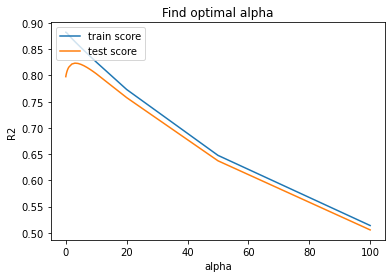

In [354]:
# Plot to detemine optimal 
cv_results_ridge = pd.DataFrame(cv_model_ridge.cv_results_)
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("Find optimal alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [355]:
print(cv_model_ridge.best_params_)

{'alpha': 3.0}


In [356]:
ridge = Ridge(alpha=3)
ridge.fit(X_train,y_train)

Ridge(alpha=3)

In [357]:
#Predict train and test using user defined function
y_train_pred, y_test_pred = train_test_predict(ridge, X_train, X_test)

In [358]:
#Print R2 for train and test using user defined function
print_metrics_r2(y_train, y_test, y_train_pred, y_test_pred)

Train_r2: 0.864
Test_r2: 0.805


### Lasso Regression

In [359]:
#cross validation to get optimal value of alpha
cv_model=GridSearchCV(estimator=Lasso(),
                      param_grid=alpha_params,
                      scoring='r2',
                      cv=5,
                      return_train_score=True,
                      verbose=1)
cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='r2', verbose=1)

In [360]:
print(cv_model.best_params_)

{'alpha': 0.001}


In [361]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [362]:
#Predict train and test using user defined function
y_train_pred, y_test_pred = train_test_predict(lasso, X_train, X_test)

In [363]:
#Print R2 for train and test using user defined function
print_metrics_r2(y_train, y_test, y_train_pred, y_test_pred)

Train_r2: 0.843
Test_r2: 0.792


In [364]:
#Get coefficients from all modesl in a dataframe
coefs = pd.DataFrame(index=X_train.columns, 
                     columns = ['Ridge', 'Lasso'])
coefs['Ridge'] = ridge.coef_ # Ridge Regression
coefs['Lasso'] = lasso.coef_ # Lasso Regression
coefs

,Ridge,Lasso
LotArea,0.060465,0.000000
OverallQual,0.248356,0.295132
OverallCond,0.104893,0.074161
YearBuilt,-0.115805,-0.109946
BsmtFinSF1,0.069387,0.000000
TotalBsmtSF,0.083467,0.000000
GrLivArea,0.266669,0.322843
GarageCars,0.133660,0.121034
OpenPorchSF,0.060737,0.021836
MSZoning_FV,0.057953,0.000000


In [365]:
#No. of features in ridge
len(coefs['Ridge'])

21

In [366]:
#Print coefficients in ridge in ascending order
coefs['Ridge'].sort_values(ascending=False)

GrLivArea               0.266669
OverallQual             0.248356
GarageCars              0.133660
OverallCond             0.104893
TotalBsmtSF             0.083467
BsmtFinSF1              0.069387
MSZoning_RL             0.061418
OpenPorchSF             0.060737
LotArea                 0.060465
MSZoning_FV             0.057953
Neighborhood_StoneBr    0.046593
RoofMatl_WdShngl        0.039025
RoofStyle_Mansard       0.022395
MSZoning_RH             0.021035
MSZoning_RM             0.014823
RoofMatl_Membran        0.013844
RoofMatl_WdShake       -0.012942
Foundation_Wood        -0.030214
Functional_Maj2        -0.046111
Exterior1st_BrkComm    -0.052475
YearBuilt              -0.115805
Name: Ridge, dtype: float64

In [367]:
#Print number of significant features in lasso model
len(coefs[coefs['Lasso']!=0])

8

In [368]:
#Print non-zero coefficients in Lasso
coefs[coefs['Lasso']!=0]['Lasso'].sort_values(ascending=False)

GrLivArea      0.322843
OverallQual    0.295132
GarageCars     0.121034
OverallCond    0.074161
MSZoning_RL    0.027916
OpenPorchSF    0.021836
MSZoning_RM   -0.018597
YearBuilt     -0.109946
Name: Lasso, dtype: float64

#### DOUBLE the alpha and check coefficients

In [369]:
#Test doubling alpha to 6
ridge = Ridge(alpha=6)
ridge.fit(X_train,y_train)

Ridge(alpha=6)

In [370]:
#Predict train and test using user defined function
y_train_pred, y_test_pred = train_test_predict(ridge, X_train, X_test)
#Print R2 for train and test using user defined function
print_metrics_r2(y_train, y_test, y_train_pred, y_test_pred)

Train_r2: 0.852
Test_r2: 0.791


In [371]:
#Doubling alpha to 0.002
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

Lasso(alpha=0.002)

In [372]:
#Predict train and test using user defined function
y_train_pred, y_test_pred = train_test_predict(lasso, X_train, X_test)
#Print R2 for train and test using user defined function
print_metrics_r2(y_train, y_test, y_train_pred, y_test_pred)

Train_r2: 0.807
Test_r2: 0.767


In [373]:
#Get coefficients from all modesl in a dataframe
coefs_double = pd.DataFrame(index=X_train.columns, 
                     columns = ['Ridge', 'Lasso'])
coefs_double['Ridge'] = ridge.coef_ # Ridge Regression
coefs_double['Lasso'] = lasso.coef_ # Lasso Regression
coefs_double

,Ridge,Lasso
LotArea,0.061241,0.000000
OverallQual,0.238515,0.331664
OverallCond,0.088759,0.007880
YearBuilt,-0.110507,-0.070895
BsmtFinSF1,0.060591,0.000000
TotalBsmtSF,0.075252,0.000000
GrLivArea,0.215566,0.204945
GarageCars,0.139474,0.121500
OpenPorchSF,0.065578,0.000000
MSZoning_FV,0.042115,0.000000


In [374]:
#No. of features ridge
len(coefs_double['Ridge'])

21

In [375]:
#Print coefficients in ridge in ascending order
coefs_double['Ridge'].sort_values(ascending=False)

OverallQual             0.238515
GrLivArea               0.215566
GarageCars              0.139474
OverallCond             0.088759
TotalBsmtSF             0.075252
OpenPorchSF             0.065578
LotArea                 0.061241
BsmtFinSF1              0.060591
MSZoning_RL             0.047058
Neighborhood_StoneBr    0.044161
MSZoning_FV             0.042115
RoofMatl_WdShngl        0.033961
RoofStyle_Mansard       0.016788
RoofMatl_Membran        0.008159
MSZoning_RH             0.006734
MSZoning_RM            -0.002355
RoofMatl_WdShake       -0.003857
Foundation_Wood        -0.018424
Exterior1st_BrkComm    -0.031317
Functional_Maj2        -0.037298
YearBuilt              -0.110507
Name: Ridge, dtype: float64

In [376]:
#Print number of significant features in lasso model
len(coefs_double[coefs_double['Lasso']!=0])

7

In [377]:
#Print non-zero coefficients in Lasso
coefs_double[coefs_double['Lasso']!=0]['Lasso'].sort_values(ascending=False)

OverallQual    0.331664
GrLivArea      0.204945
GarageCars     0.121500
MSZoning_RL    0.026853
OverallCond    0.007880
MSZoning_RM   -0.019156
YearBuilt     -0.070895
Name: Lasso, dtype: float64

### Remove top 5 feature from LASSO

In [378]:
features_to_drop = ['GrLivArea','OverallQual','GarageCars','YearBuilt','OverallCond']
X_train.drop(features_to_drop,axis=1, inplace=True)
X_test.drop(features_to_drop,axis=1, inplace=True)

In [379]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
#Predict train and test using user defined function
y_train_pred, y_test_pred = train_test_predict(lasso, X_train, X_test)
#Print R2 for train and test using user defined function
print_metrics_r2(y_train, y_test, y_train_pred, y_test_pred)

Train_r2: 0.503
Test_r2: 0.432


In [380]:
#Get coefficients from all modesl in a dataframe
coefs_lasso_2 = pd.DataFrame(index=X_train.columns, columns = ['Lasso'])
coefs_lasso_2['Lasso'] = lasso.coef_ # Lasso Regression
#Print coefficients in ridge in ascending order
coefs_lasso_2['Lasso'].sort_values(ascending=False)

TotalBsmtSF             0.683008
OpenPorchSF             0.163554
MSZoning_FV             0.120372
LotArea                 0.093818
MSZoning_RL             0.079777
Neighborhood_StoneBr    0.077615
Foundation_Wood         0.000000
Exterior1st_BrkComm    -0.000000
RoofMatl_WdShngl        0.000000
RoofMatl_WdShake        0.000000
RoofMatl_Membran        0.000000
RoofStyle_Mansard       0.000000
MSZoning_RM            -0.000000
MSZoning_RH            -0.000000
BsmtFinSF1              0.000000
Functional_Maj2        -0.015332
Name: Lasso, dtype: float64